#Clasificación de variedades de frijoles a partir de características morfológicas

Sharon Xolocotzi Castillo

# 1. Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install scikit-fuzzy
import skfuzzy as fuzz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, f1_score, silhouette_score)
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#2. Exploracion de Datos

In [ ]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

print("Muestras:", df.shape[0])
print("Variables:", df.shape[1])

Muestras: 13611
Variables: 17


In [ ]:
print("\nColumnas:")
print(df.columns)


Columnas:
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [ ]:
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [ ]:
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [ ]:
print("\nPrimeras filas:")
print(df.head())



Primeras filas:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.91335

#3. Analisis Descrptivo

In [ ]:
print("\n" + "="*80)
print("3.1 ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
print(df.describe())


3.1 ESTADÍSTICAS DESCRIPTIVAS
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086

In [ ]:
print("\n" + "="*80)
print("3.2 DISTRIBUCIÓN DE VARIEDADES DE FRIJOLES")
print("="*80)
class_distribution = df['Class'].value_counts()
print(class_distribution)
print(f"\nTotal de variedades: {df['Class'].nunique()}")




3.2 DISTRIBUCIÓN DE VARIEDADES DE FRIJOLES
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Total de variedades: 7


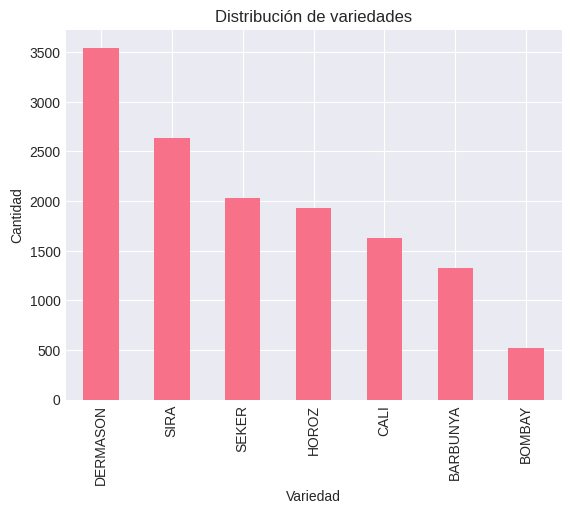

In [ ]:
df["Class"].value_counts().plot(kind="bar")
plt.xlabel("Variedad")
plt.ylabel("Cantidad")
plt.title("Distribución de variedades")
plt.show()


In [ ]:
# 3.3 ANÁLISIS DE DISTRIBUCIONES DE CARACTERÍSTICAS
# Separar características y etiquetas
X = df.drop('Class', axis=1)
y = df['Class']


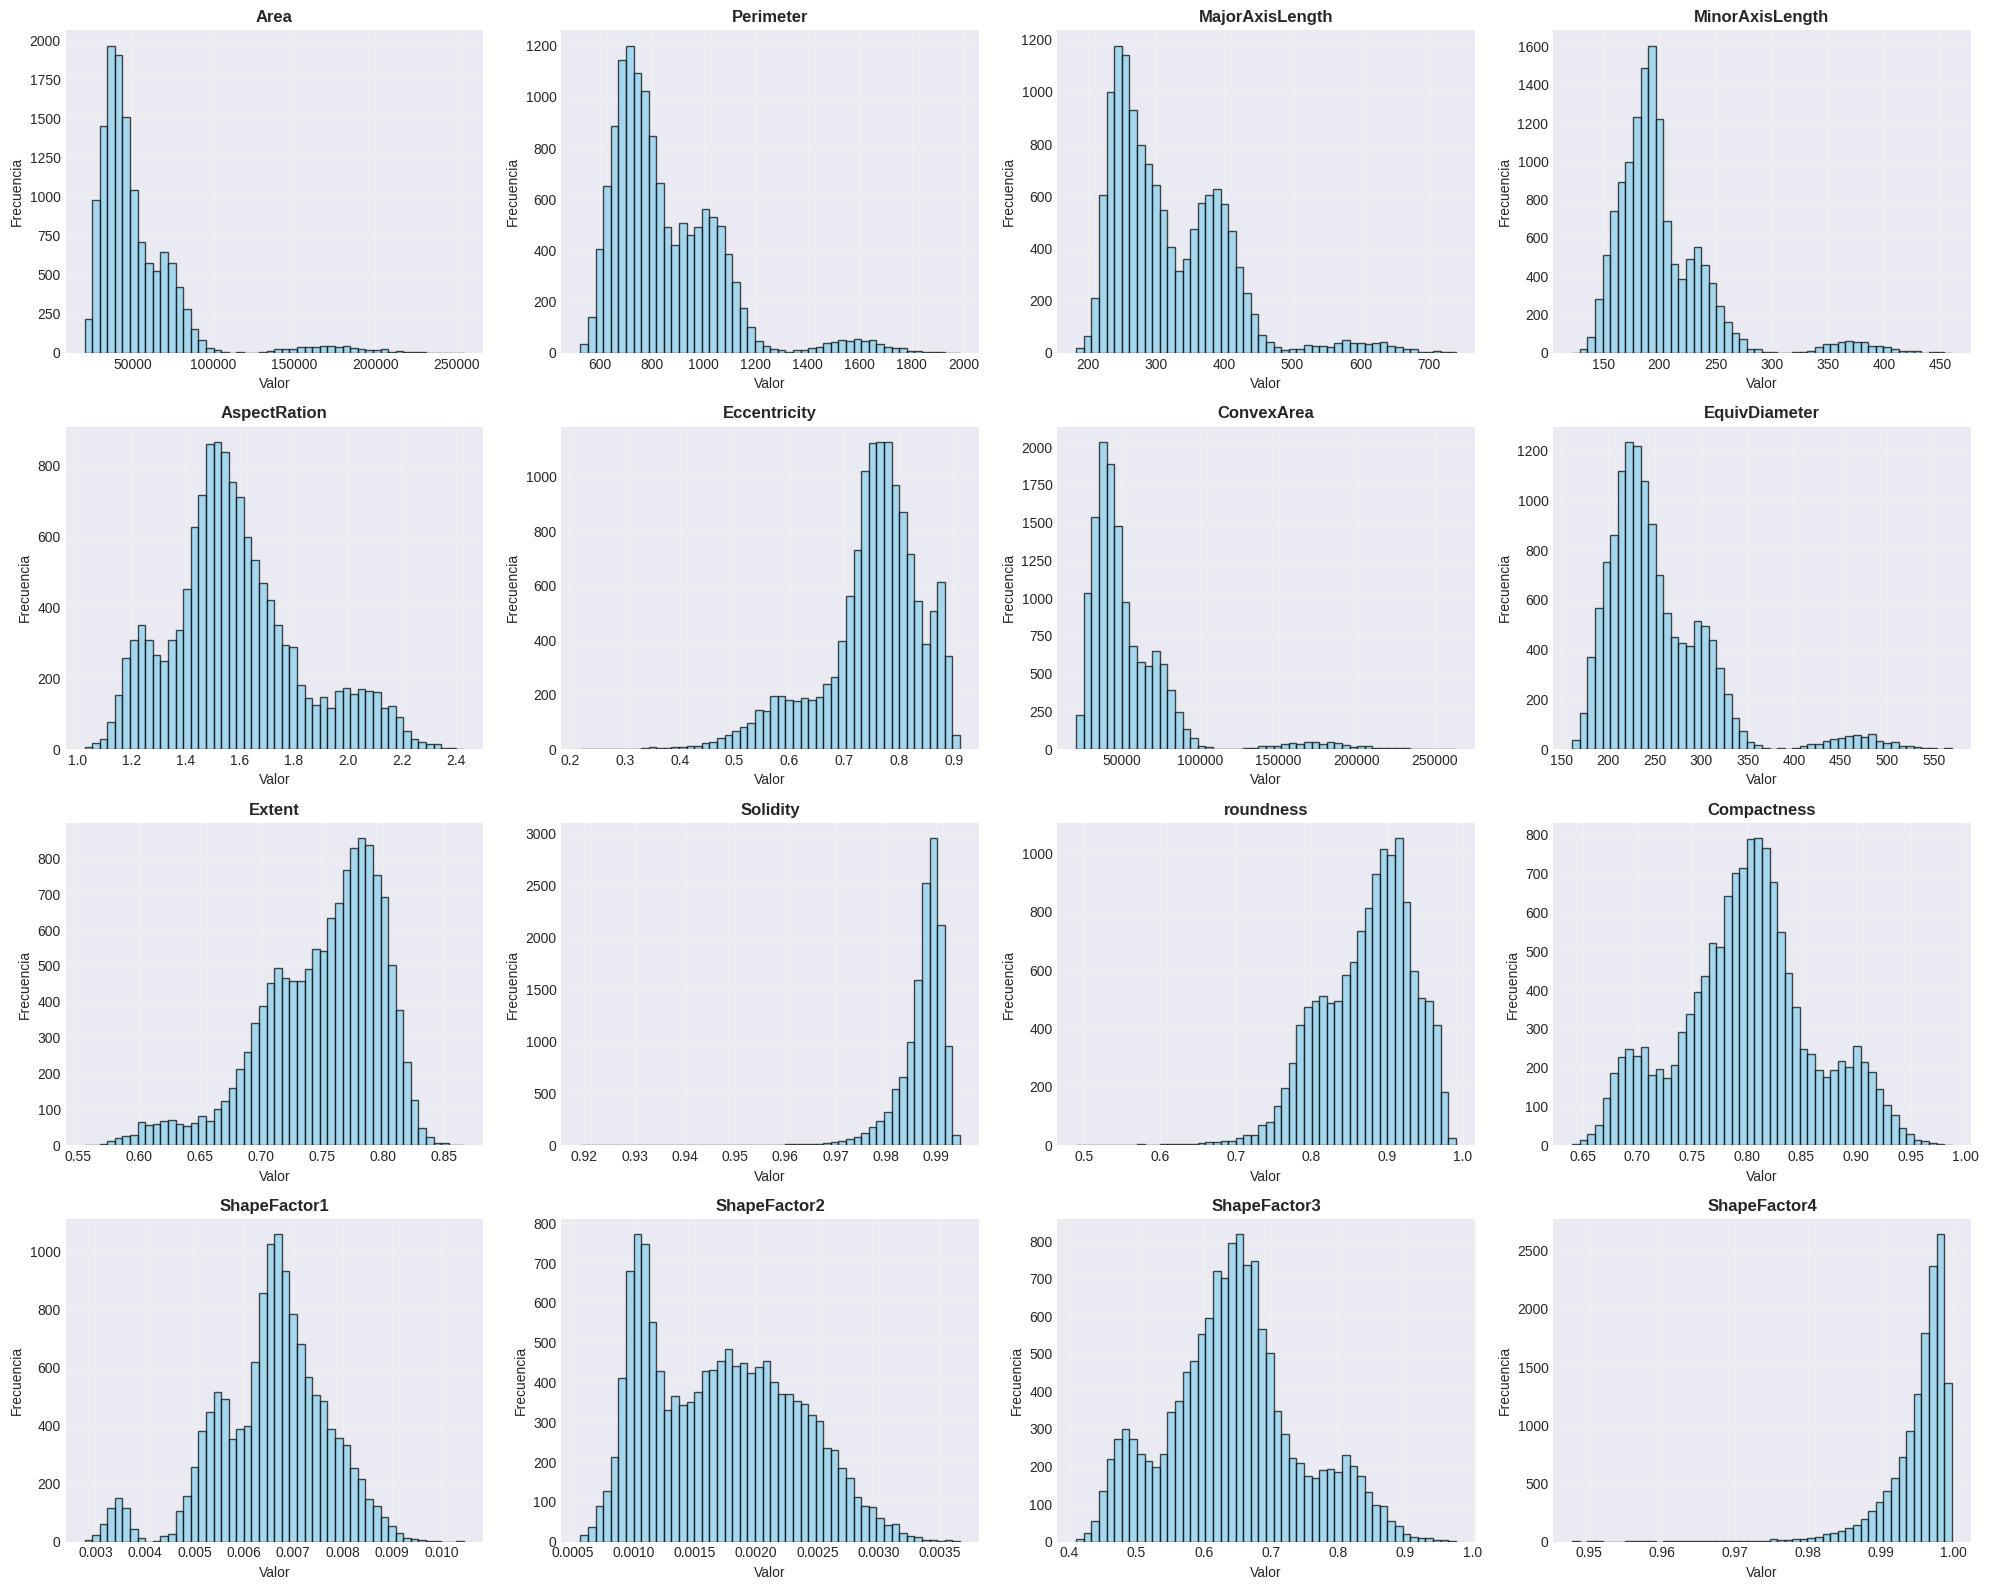

In [ ]:
# Histogramas de todas las características
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    axes[idx].hist(X[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_histogramas_caracteristicas.png', dpi=300, bbox_inches='tight')
plt.show()


3.4 ANÁLISIS DE CORRELACIONES


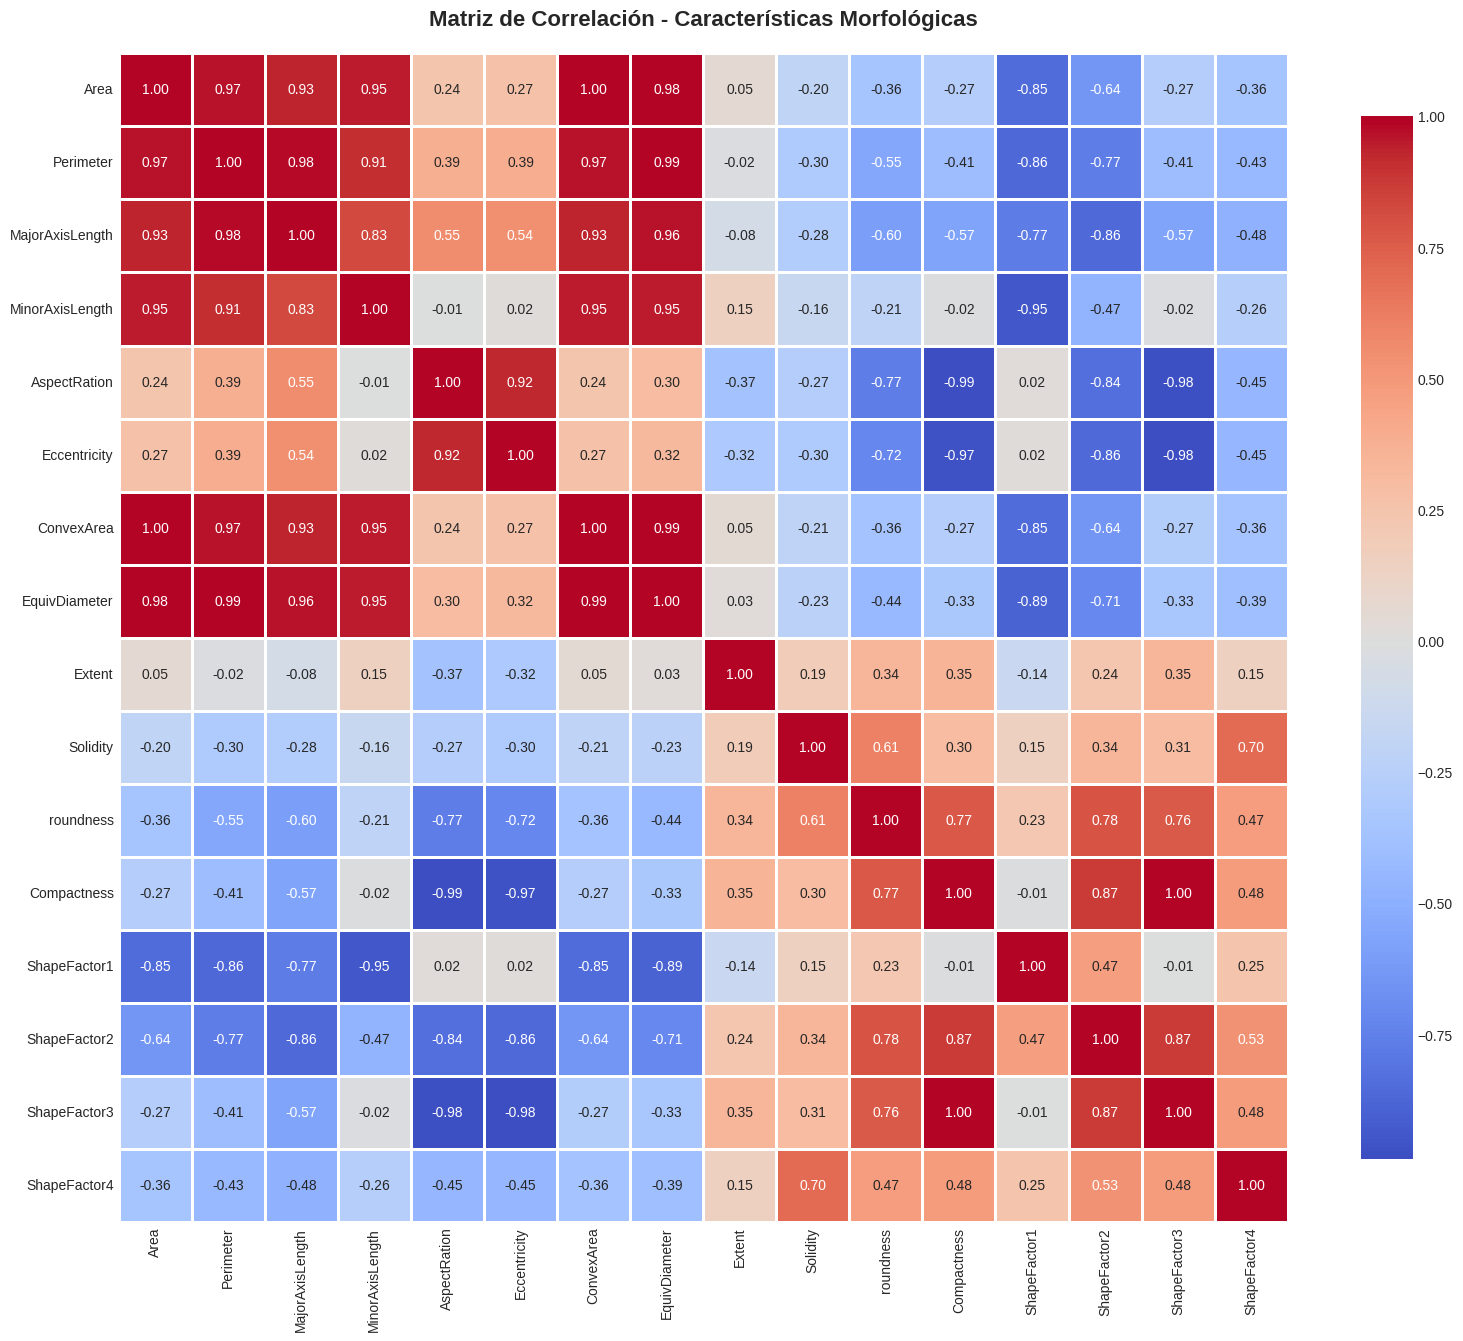

In [ ]:
print("\n" + "="*80)
print("3.4 ANÁLISIS DE CORRELACIONES")
print("="*80)

# Calcular matriz de correlación
correlation_matrix = X.corr()

# Visualizar con heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Características Morfológicas',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('03_matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Identificar correlaciones altas
print("\nCaracterísticas con correlación > 0.9:")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_corr.append((correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j]))
            print(f"  {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")



Características con correlación > 0.9:
  Area ↔ Perimeter: 0.967
  Area ↔ MajorAxisLength: 0.932
  Area ↔ MinorAxisLength: 0.952
  Area ↔ ConvexArea: 1.000
  Area ↔ EquivDiameter: 0.985
  Perimeter ↔ MajorAxisLength: 0.977
  Perimeter ↔ MinorAxisLength: 0.913
  Perimeter ↔ ConvexArea: 0.968
  Perimeter ↔ EquivDiameter: 0.991
  MajorAxisLength ↔ ConvexArea: 0.933
  MajorAxisLength ↔ EquivDiameter: 0.962
  MinorAxisLength ↔ ConvexArea: 0.951
  MinorAxisLength ↔ EquivDiameter: 0.949
  MinorAxisLength ↔ ShapeFactor1: -0.947
  AspectRation ↔ Eccentricity: 0.924
  AspectRation ↔ Compactness: -0.988
  AspectRation ↔ ShapeFactor3: -0.979
  Eccentricity ↔ Compactness: -0.970
  Eccentricity ↔ ShapeFactor3: -0.981
  ConvexArea ↔ EquivDiameter: 0.985
  Compactness ↔ ShapeFactor3: 0.999


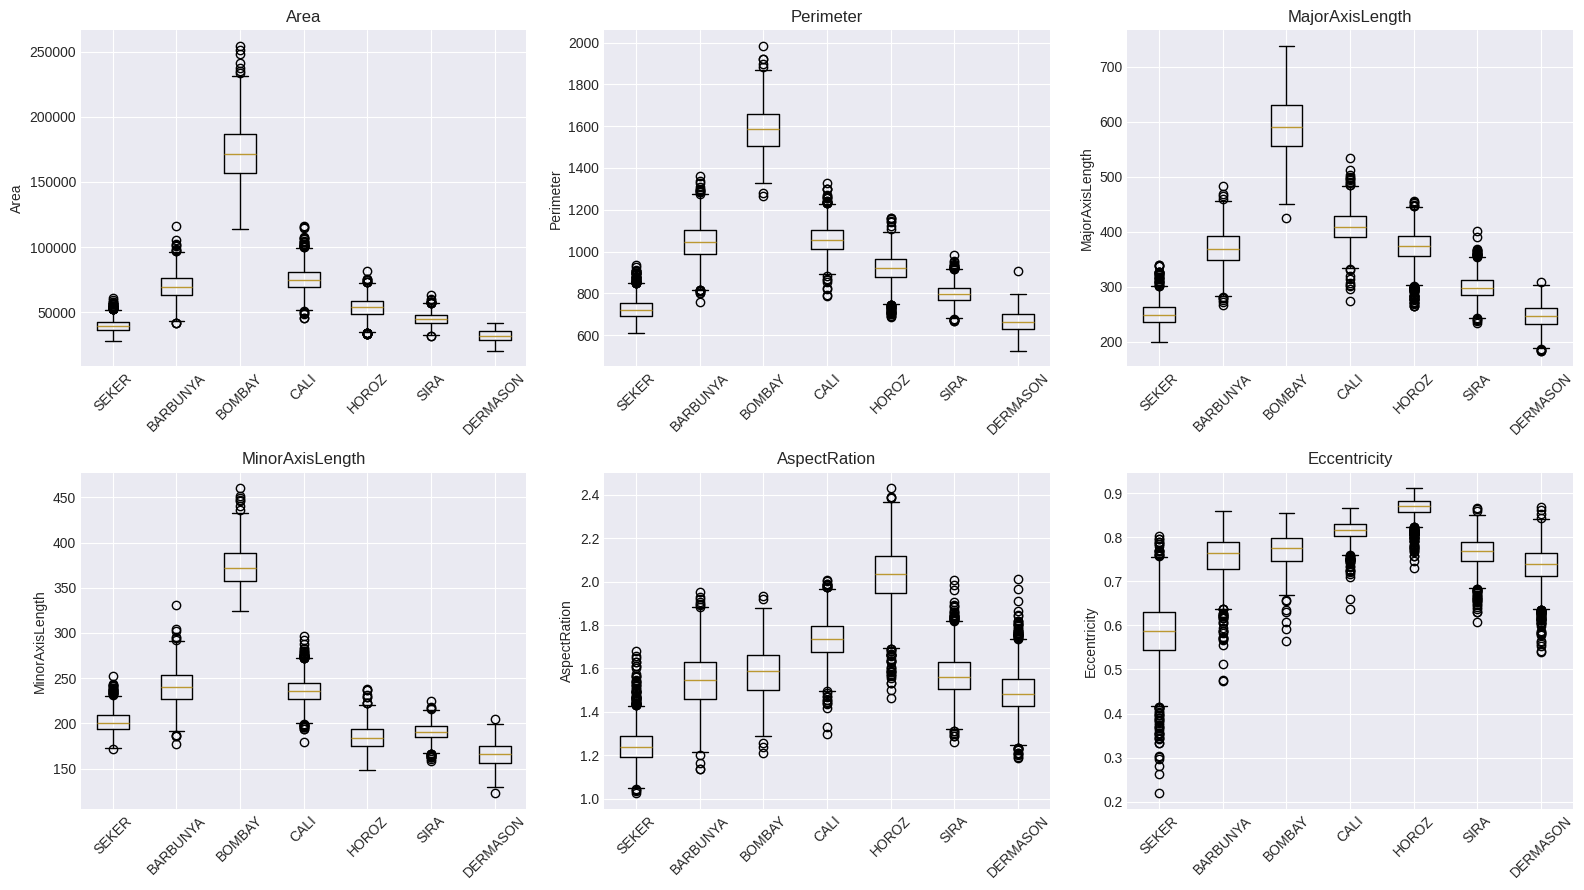

In [ ]:

key_features = ['Area', 'Perimeter', 'MajorAxisLength',
                'MinorAxisLength', 'AspectRation', 'Eccentricity']

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    data = [df[df["Class"] == c][feature] for c in df["Class"].unique()]
    axes[i].boxplot(data)
    axes[i].set_title(feature)
    axes[i].set_xticks(range(1, len(df["Class"].unique()) + 1))
    axes[i].set_xticklabels(df["Class"].unique(), rotation=45)
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*80)
print("3.6 DETECCIÓN DE VALORES ATÍPICOS")
print("="*80)

def detect_outliers_iqr(data):
    """Detecta outliers usando el método IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

outliers_count = {}
for col in X.columns:
    outliers_count[col] = detect_outliers_iqr(X[col])

outliers_df = pd.DataFrame.from_dict(outliers_count, orient='index',
                                     columns=['Número de Outliers'])
outliers_df = outliers_df.sort_values('Número de Outliers', ascending=False)
print("\nOutliers por característica:")
print(outliers_df)



3.6 DETECCIÓN DE VALORES ATÍPICOS

Outliers por característica:
                 Número de Outliers
Eccentricity                    843
Solidity                        778
ShapeFactor4                    767
MinorAxisLength                 569
Area                            551
ConvexArea                      550
ShapeFactor1                    533
EquivDiameter                   526
Perimeter                       500
AspectRation                    473
MajorAxisLength                 379
Extent                          275
ShapeFactor3                    195
Compactness                     109
roundness                        91
ShapeFactor2                      0


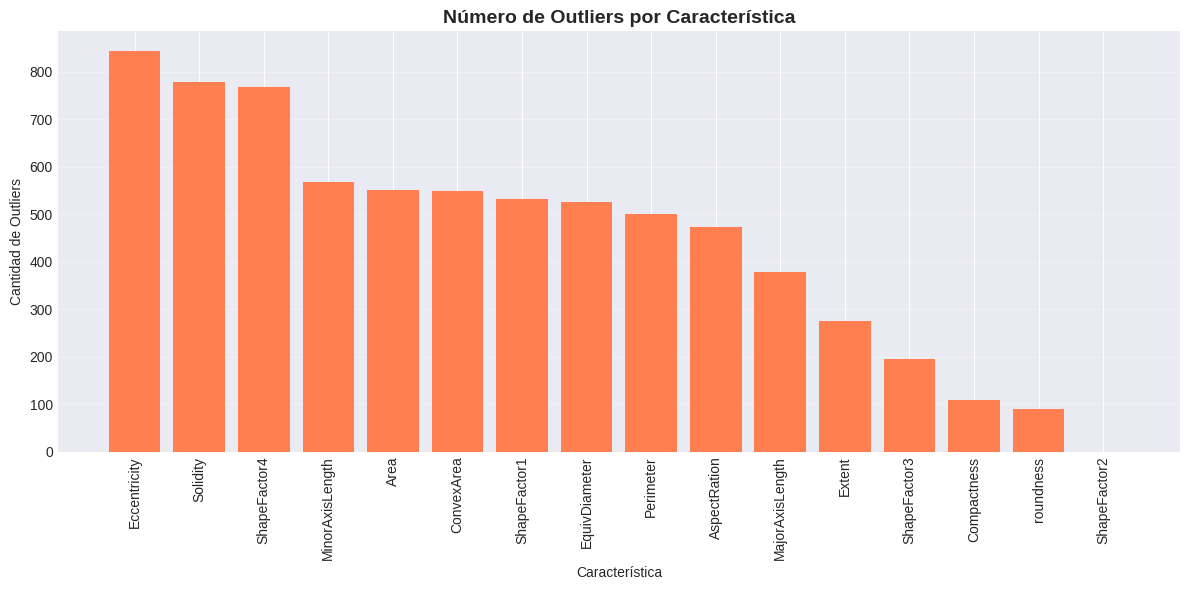

In [ ]:
# Visualizar outliers
plt.figure(figsize=(12, 6))
plt.bar(outliers_df.index, outliers_df['Número de Outliers'], color='coral')
plt.title('Número de Outliers por Característica', fontsize=14, fontweight='bold')
plt.xlabel('Característica')
plt.ylabel('Cantidad de Outliers')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('05_outliers_por_caracteristica.png', dpi=300, bbox_inches='tight')
plt.show()


#4. Preprocesamiento de datos

##4.1 Normalización

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Datos normalizados (StandardScaler)")
print(f"  Media de características escaladas: {X_scaled.mean(axis=0).mean():.6f}")
print(f"  Desviación estándar: {X_scaled.std(axis=0).mean():.6f}")

✓ Datos normalizados (StandardScaler)
  Media de características escaladas: -0.000000
  Desviación estándar: 1.000000


## 4.2 Reducción de dimensionalidad para visualización

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

print(f"  Varianza explicada PC1: {explained_variance[0]:.2%}")
print(f"  Varianza explicada PC2: {explained_variance[1]:.2%}")
print(f"  Varianza total explicada: {explained_variance.sum():.2%}")

  Varianza explicada PC1: 55.47%
  Varianza explicada PC2: 26.43%
  Varianza total explicada: 81.90%


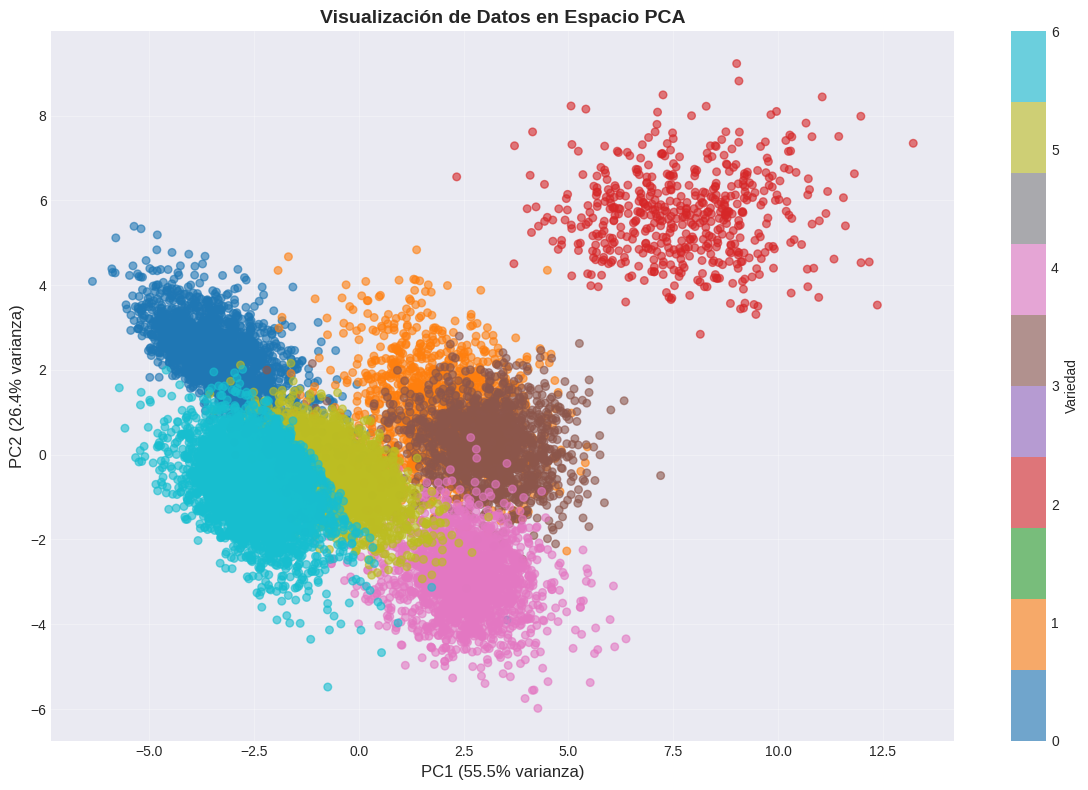

In [ ]:
# Visualizar datos en espacio PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0],
                     cmap='tab10', alpha=0.6, s=30)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} varianza)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} varianza)', fontsize=12)
plt.title('Visualización de Datos en Espacio PCA', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Variedad', ticks=range(len(y.unique())))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('06_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. AGRUPAMIENTO DIFUSO - FUZZY C-MEANS

## 5.1 FCM con k=7

In [ ]:
n_clusters_7 = 7
cntr_7, u_7, u0_7, d_7, jm_7, p_7, fpc_7 = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters_7, 2, error=0.005, maxiter=1000, init=None
)
# Asignar cada muestra al cluster con mayor pertenencia
cluster_membership_7 = np.argmax(u_7, axis=0)

print(f"  Fuzzy Partition Coefficient (FPC): {fpc_7:.4f}")
print(f"  Número de iteraciones: {p_7}")

  Fuzzy Partition Coefficient (FPC): 0.3816
  Número de iteraciones: 129


In [ ]:
# Calcular índices de validación
silhouette_7 = silhouette_score(X_scaled, cluster_membership_7)
davies_bouldin_7 = davies_bouldin_score(X_scaled, cluster_membership_7)
calinski_harabasz_7 = calinski_harabasz_score(X_scaled, cluster_membership_7)

print(f"\nÍndices de Validación (k=7):")
print(f"  Silhouette Score: {silhouette_7:.4f}")


Índices de Validación (k=7):
  Silhouette Score: 0.2805


##5.2 BÚSQUEDA DEL NÚMERO ÓPTIMO DE CLUSTERS

In [ ]:
k_range = range(2, 12)
fpc_scores = []
silhouette_scores = []
davies_bouldin_scores = []

print("\nProbando diferentes valores de k...")
for k in k_range:
    cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
        X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
    )
    cluster_membership = np.argmax(u, axis=0)

    fpc_scores.append(fpc)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_membership))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, cluster_membership))

    print(f"  k={k}: FPC={fpc:.4f}, Silhouette={silhouette_scores[-1]:.4f}")


Probando diferentes valores de k...
  k=2: FPC=0.7126, Silhouette=0.3934
  k=3: FPC=0.5254, Silhouette=0.2229
  k=4: FPC=0.4943, Silhouette=0.3128
  k=5: FPC=0.4282, Silhouette=0.2504
  k=6: FPC=0.4338, Silhouette=0.2942
  k=7: FPC=0.3816, Silhouette=0.2805
  k=8: FPC=0.3366, Silhouette=0.2404
  k=9: FPC=0.3170, Silhouette=0.2437
  k=10: FPC=0.2885, Silhouette=0.2347
  k=11: FPC=0.2757, Silhouette=0.2433


Aunque los valores más altos de FPC y Silhouette se obtienen para k=2, este valor genera agrupamientos demasiado generales que no permiten analizar las diferencias entre las variedades reales de frijol. Considerando el objetivo del estudio y el conocimiento previo del conjunto de datos, se seleccionó k=7, ya que corresponde al número de variedades presentes y ofrece un equilibrio razonable entre calidad del agrupamiento e interpretabilidad de los resultados.

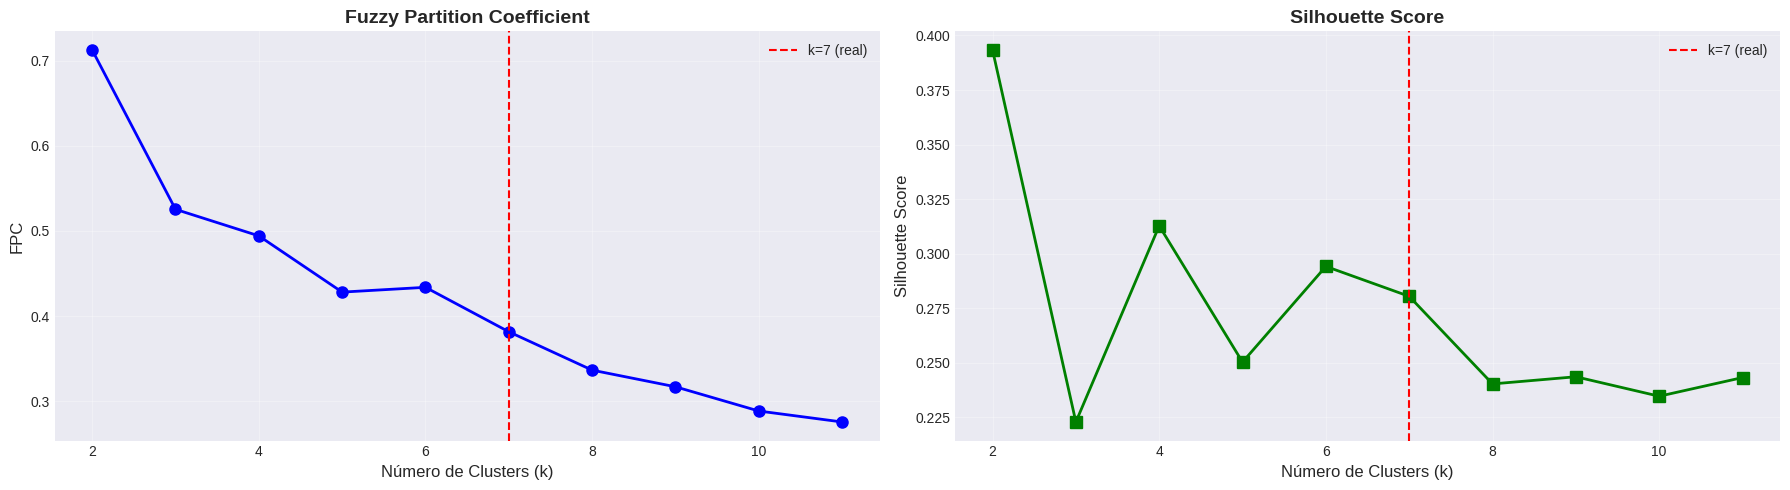

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(k_range, fpc_scores, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[0].set_ylabel('FPC', fontsize=12)
axes[0].set_title('Fuzzy Partition Coefficient', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=7, color='red', linestyle='--', label='k=7 (real)')
axes[0].legend()

axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=7, color='red', linestyle='--', label='k=7 (real)')
axes[1].legend()


plt.tight_layout()
plt.savefig('07_validacion_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Determinar k óptimo
optimal_k_fpc = k_range[np.argmax(fpc_scores)]
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_db = k_range[np.argmin(davies_bouldin_scores)]

print(f"\n Valores óptimos de k según cada métrica:")
print(f"  FPC: k={optimal_k_fpc}")
print(f"  Silhouette: k={optimal_k_silhouette}")


 Valores óptimos de k según cada métrica:
  FPC: k=2
  Silhouette: k=2


Las métricas FPC y Silhouette alcanzan sus valores máximos para k=2. Sin embargo, este valor genera agrupamientos demasiado generales. Dado que el conjunto de datos contiene siete variedades de frijol, se seleccionó k=7 para facilitar la interpretación y la comparación con las clases reales.

## 5.3 FCM con k óptimo

In [ ]:
k_optimal = 7  # Valor común para descubrir subgrupos
cntr_opt, u_opt, u0_opt, d_opt, jm_opt, p_opt, fpc_opt = fuzz.cluster.cmeans(
    X_scaled.T, k_optimal, 2, error=0.005, maxiter=1000, init=None
)

cluster_membership_opt = np.argmax(u_opt, axis=0)

print(f" Fuzzy Partition Coefficient (FPC): {fpc_opt:.4f}")

 Fuzzy Partition Coefficient (FPC): 0.3812


## 5.4 Análisis básico de pertenencia difusa

Distribución de muestras por cluster:
  Cluster 0: 1622 muestras
  Cluster 1: 1422 muestras
  Cluster 2: 3089 muestras
  Cluster 3: 1835 muestras
  Cluster 4: 3095 muestras
  Cluster 5: 2025 muestras
  Cluster 6: 523 muestras


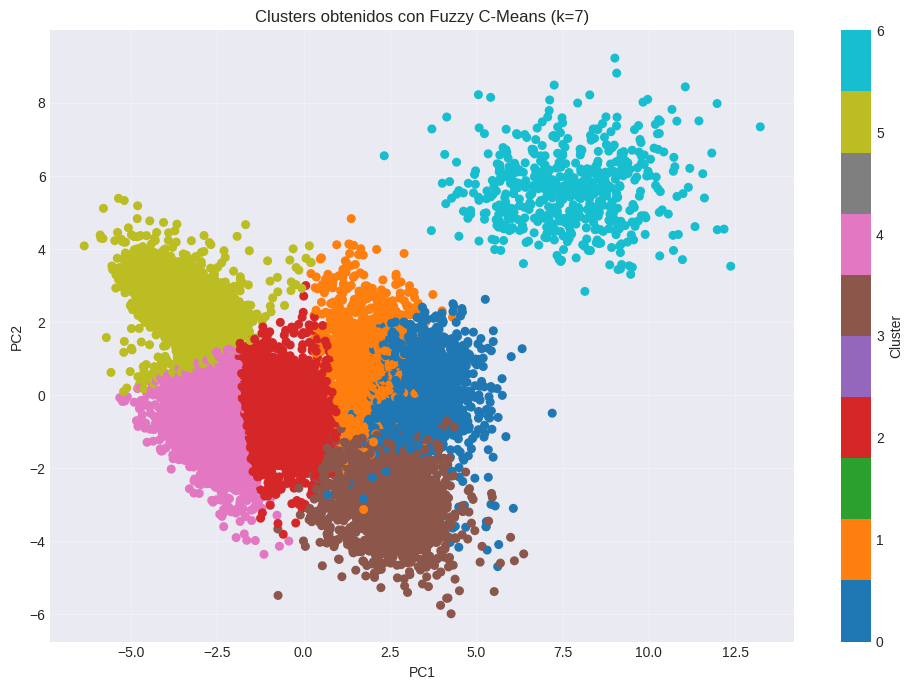

In [ ]:
# Asignación final de cluster (mayor pertenencia)
cluster_membership = np.argmax(u_opt, axis=0)

# Conteo de elementos por cluster
unique, counts = np.unique(cluster_membership, return_counts=True)

print("Distribución de muestras por cluster:")
for c, n in zip(unique, counts):
    print(f"  Cluster {c}: {n} muestras")

# Visualización de clusters en PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_membership, cmap='tab10', s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clusters obtenidos con Fuzzy C-Means (k={k_optimal})')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#6. Modelos

## 6.1 División de datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(f"  Entrenamiento: {X_train.shape[0]} muestras")
print(f"  Prueba: {X_test.shape[0]} muestras")


  Entrenamiento: 9527 muestras
  Prueba: 4084 muestras


##6.2 ENTRENAMIENTO DE MODELOS

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

results['Random Forest'] = {
    'model': rf_classifier,
    'y_pred': y_pred_rf,
    'accuracy': accuracy_rf,
    'precision': precision_rf,
    'recall': recall_rf,
    'f1_score': f1_rf
}

print("Resultados Random Forest:")
print(f"  Accuracy : {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall   : {recall_rf:.4f}")
print(f"  F1-Score : {f1_rf:.4f}")

Resultados Random Forest:
  Accuracy : 0.9204
  Precision: 0.9204
  Recall   : 0.9204
  F1-Score : 0.9203


El clasificador Random Forest obtuvo un desempeño general del 92%, mostrando un balance adecuado entre precisión y recuperación en todas las clases. Estos resultados indican que las características morfológicas utilizadas permiten distinguir eficazmente entre las variedades de frijoles.

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

results['SVM'] = {
    'model': svm_classifier,
    'y_pred': y_pred_svm,
    'accuracy': accuracy_svm,
    'precision': precision_svm,
    'recall': recall_svm,
    'f1_score': f1_svm
}

print("Resultados SVM:")
print(f"  Accuracy : {accuracy_svm:.4f}")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall   : {recall_svm:.4f}")
print(f"  F1-Score : {f1_svm:.4f}")

Resultados SVM:
  Accuracy : 0.9258
  Precision: 0.9261
  Recall   : 0.9258
  F1-Score : 0.9258


In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

results['KNN'] = {
    'model': knn_classifier,
    'y_pred': y_pred_knn,
    'accuracy': accuracy_knn,
    'precision': precision_knn,
    'recall': recall_knn,
    'f1_score': f1_knn
}

print("Resultados KNN:")
print(f"  Accuracy : {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall   : {recall_knn:.4f}")
print(f"  F1-Score : {f1_knn:.4f}")

Resultados KNN:
  Accuracy : 0.9175
  Precision: 0.9179
  Recall   : 0.9175
  F1-Score : 0.9176


##6.3 Comaparacion de Modelos

In [ ]:
comparison_df = pd.DataFrame({
    'Clasificador': list(results.keys()),
    'Accuracy': [results[k]['accuracy'] for k in results.keys()],
    'Precision': [results[k]['precision'] for k in results.keys()],
    'Recall': [results[k]['recall'] for k in results.keys()],
    'F1-Score': [results[k]['f1_score'] for k in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\nTabla Comparativa de Modelos:")
print(comparison_df.to_string(index=False))



Tabla Comparativa de Modelos:
 Clasificador  Accuracy  Precision   Recall  F1-Score
          SVM  0.925808   0.926083 0.925808  0.925850
Random Forest  0.920421   0.920367 0.920421  0.920343
          KNN  0.917483   0.917866 0.917483  0.917555


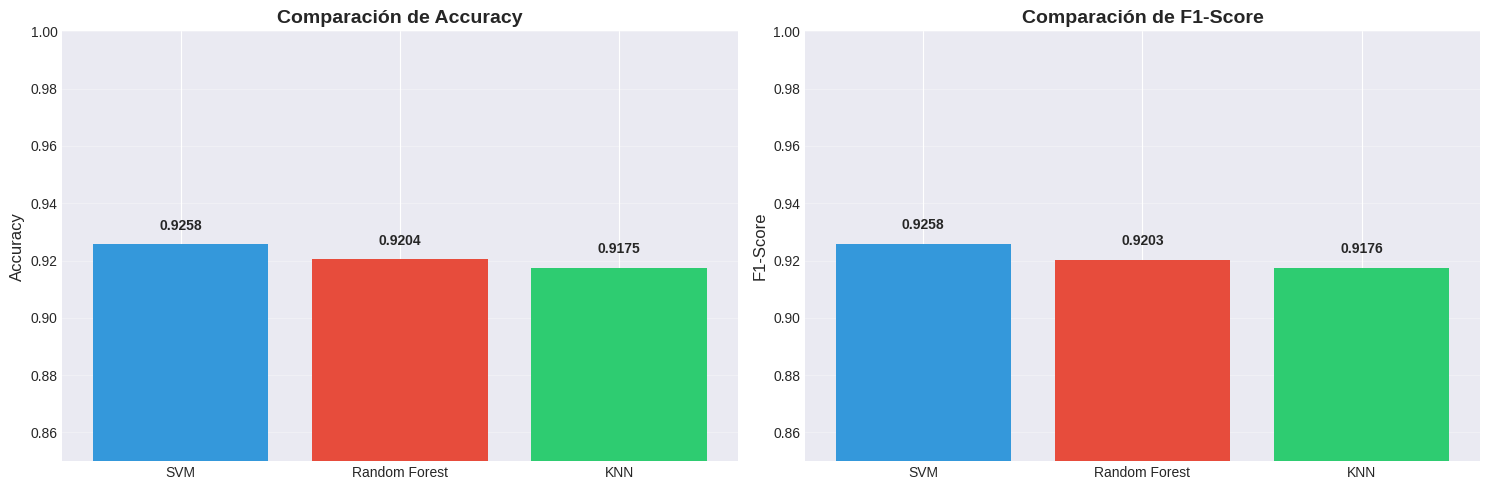

In [ ]:
# Visualizar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras para Accuracy
axes[0].bar(comparison_df['Clasificador'], comparison_df['Accuracy'],
           color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Comparación de Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylim([0.85, 1.0])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Gráfico de barras para F1-Score
axes[1].bar(comparison_df['Clasificador'], comparison_df['F1-Score'],
           color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('Comparación de F1-Score', fontsize=14, fontweight='bold')
axes[1].set_ylim([0.85, 1.0])
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['F1-Score']):
    axes[1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('11_comparacion_clasificadores.png', dpi=300, bbox_inches='tight')
plt.show()

##6.4 MATRICES DE CONFUSION


6.4 MATRICES DE CONFUSIÓN


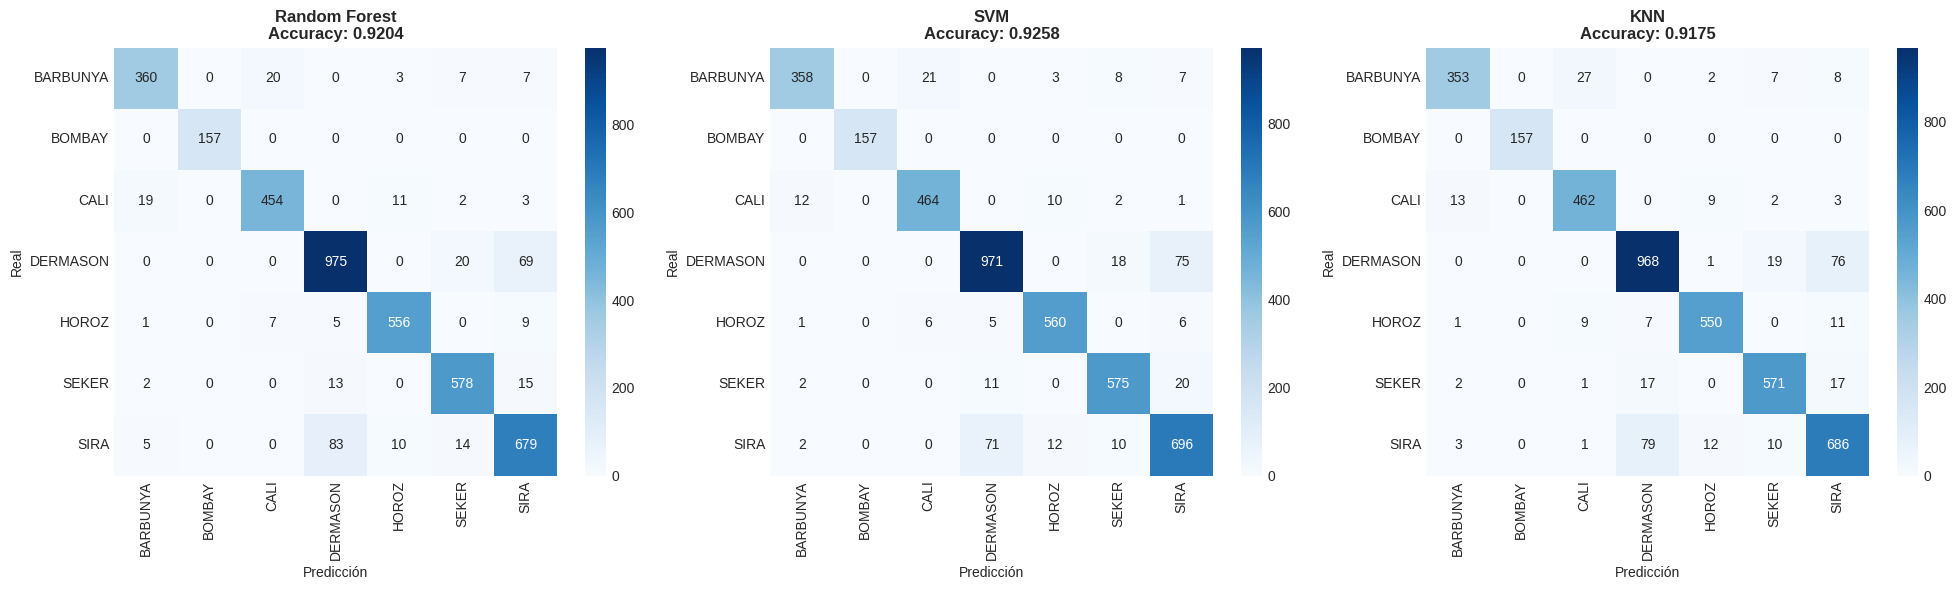

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, data['y_pred'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
               xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    axes[idx].set_title(f'{name}\nAccuracy: {data["accuracy"]:.4f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicción', fontsize=10)
    axes[idx].set_ylabel('Real', fontsize=10)

plt.tight_layout()
plt.savefig('12_matrices_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
best_classifier = comparison_df.iloc[0]['Clasificador']
print(f"\n Mejor Modelo: {best_classifier}")
print(f"   Accuracy: {results[best_classifier]['accuracy']:.4f}")
print(f"   F1-Score: {results[best_classifier]['f1_score']:.4f}")

print(f"\nReporte  {best_classifier}:")
print(classification_report(y_test, results[best_classifier]['y_pred'],
                           target_names=sorted(y.unique())))


 Mejor Modelo: SVM
   Accuracy: 0.9258
   F1-Score: 0.9258

Reporte  SVM:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       397
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.95      0.95      0.95       489
    DERMASON       0.92      0.91      0.92      1064
       HOROZ       0.96      0.97      0.96       578
       SEKER       0.94      0.95      0.94       608
        SIRA       0.86      0.88      0.87       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



##6.6 Importancia de caracteristicas (Random Forest)


Top 10 Características más importantes:
 Característica  Importancia
   ShapeFactor3     0.107516
      Perimeter     0.092877
    Compactness     0.091321
   ShapeFactor1     0.081815
     ConvexArea     0.077921
MinorAxisLength     0.077458
   Eccentricity     0.070880
MajorAxisLength     0.068832
  EquivDiameter     0.066217
           Area     0.057493


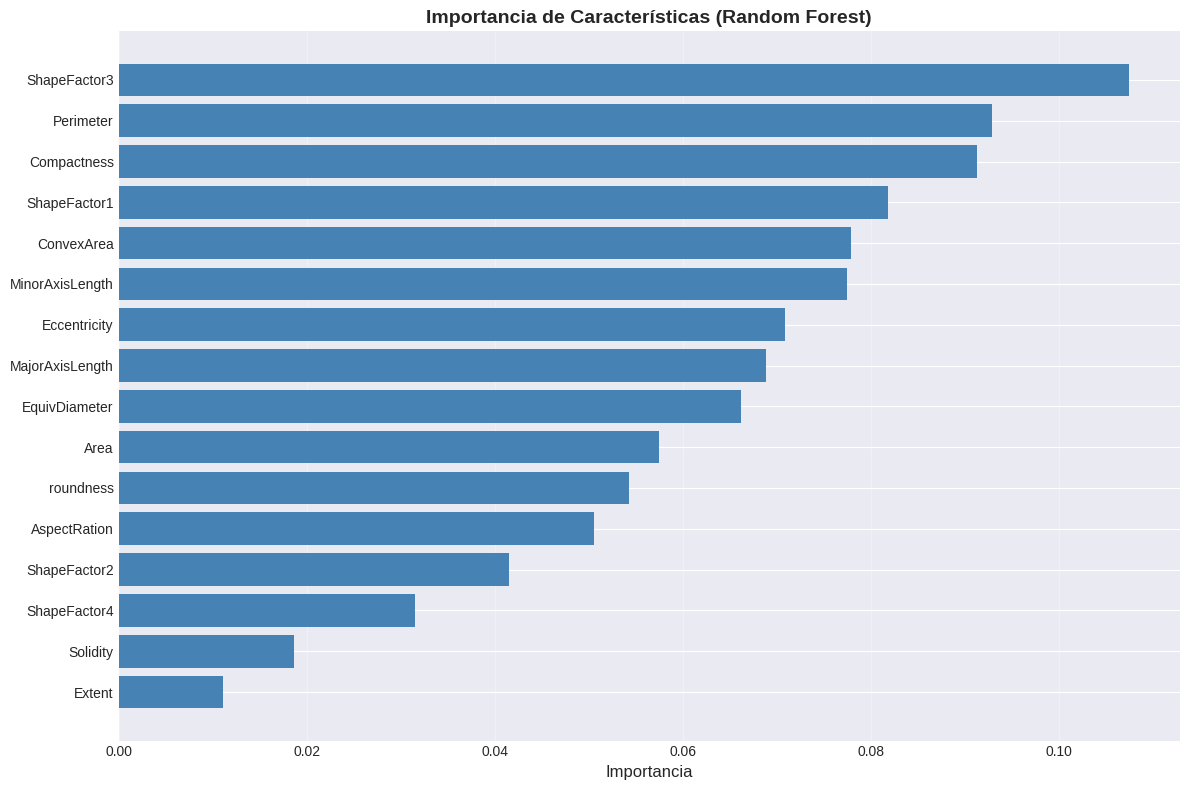

In [ ]:
if 'Random Forest' in results:
    feature_importance = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': results['Random Forest']['model'].feature_importances_
    }).sort_values('Importancia', ascending=False)

    print("\nTop 10 Características más importantes:")
    print(feature_importance.head(10).to_string(index=False))

    # Visualizar importancia
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(feature_importance)), feature_importance['Importancia'],
            color='steelblue')
    plt.yticks(range(len(feature_importance)), feature_importance['Característica'])
    plt.xlabel('Importancia', fontsize=12)
    plt.title('Importancia de Características (Random Forest)',
             fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('14_importancia_caracteristicas.png', dpi=300, bbox_inches='tight')
    plt.show()

En general, los modelos supervisados mostraron un desempeño alto, siendo SVM el mejor clasificador. Esto indica que las características morfológicas del conjunto de datos son adecuadas para la clasificación de variedades de frijol.”